# Steps and Tasks

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [373]:
#https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-Ghaidaa-AlKuhaili

In [374]:
bank_data = pd.read_csv('bank-full.csv')
bank_data.head()
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [375]:
cols = bank_data.columns.tolist()
for col in cols:
    print(bank_data[col].value_counts(normalize=True))

32    0.046117
31    0.044149
33    0.043618
34    0.042689
35    0.041892
36    0.039946
30    0.038862
37    0.037513
39    0.032890
38    0.032426
40    0.029971
41    0.028555
42    0.027471
45    0.026896
29    0.026210
46    0.025989
43    0.025680
44    0.025127
47    0.024065
28    0.022959
48    0.022052
49    0.021986
50    0.020769
51    0.020703
52    0.020150
27    0.020106
53    0.019708
57    0.018314
54    0.017938
55    0.017828
        ...   
67    0.001194
71    0.001194
72    0.001150
20    0.001106
77    0.000973
73    0.000973
69    0.000973
75    0.000863
74    0.000818
68    0.000796
19    0.000774
76    0.000708
80    0.000686
78    0.000664
79    0.000553
83    0.000487
82    0.000420
81    0.000376
18    0.000265
84    0.000199
86    0.000199
85    0.000111
87    0.000088
89    0.000066
88    0.000044
90    0.000044
92    0.000044
93    0.000044
95    0.000044
94    0.000022
Name: age, Length: 77, dtype: float64
blue-collar      0.215257
management       0.20

# Deliverable-1 (Exploratory data quality report)

# 1. Univariate analysis

# a. data types of all features

In [376]:
bank_data.dtypes #no categorical values

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [377]:
# we can tell that we have 7 numerical  attributes and 10 categoriacl or string  attributes

In [378]:
# studying numerical attributes

In [379]:
bank_data.describe().transpose() # since not all the attributes are numerical, the below description is considered incomplete because it is not covering categorical attributes

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [380]:
# To get the description of categorial attributes:
# 1. we will generate dummy variables for the attributes containing only two values(yes/ no) or (success/failure) etc
# subsequent cells will cover the process of generating dummy variables
# but before we move on, we should manage the "unknown" values in the dataset. We could either replace it with the mode(since we are working with categorical values or simplete delete the rows)

In [381]:
# To do so: we started with checking the value counts of all object type columns

In [382]:
for i in list(bank_data.columns[bank_data.dtypes=='object']):   
    print(bank_data[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

In [383]:
# For the sake of this project we will drop "unknown" rows. 

# Job attribute contains only 288 unkowns >> so we will drop it
# Education includes 1857 which is considered low >> we will drop it

# Huge number of recordds in the poutcome is unknows, in normal cases we will go with dropping the entire col, but I found if I dropped the unknown rows with keeping the columne it will end up with having a correlation of 0.5 with out Target class>> so I decided to keep it


# Default attribute is imbalanced 
# Loan attribute is imbalanced 
# Our Target attribute is imbalanced !

# the months are fairly distributed


In [384]:
# to remove "Unknown"

In [385]:
bank_data = bank_data[bank_data.job != "unknown"]
bank_data = bank_data[bank_data.education != "unknown"]
bank_data = bank_data[bank_data.contact != "unknown"]
bank_data = bank_data[bank_data.poutcome != "unknown"]
bank_data = bank_data[bank_data.poutcome != "other"] # we are only interested in success/failure and we have a good amount of data so we can drop it

In [386]:
#fixing imbalanced attributes()

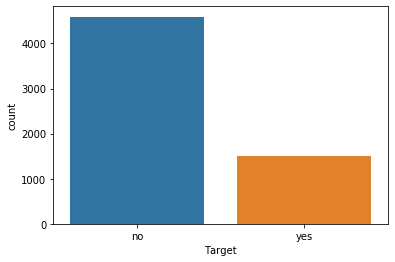

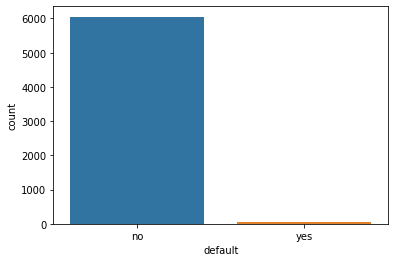

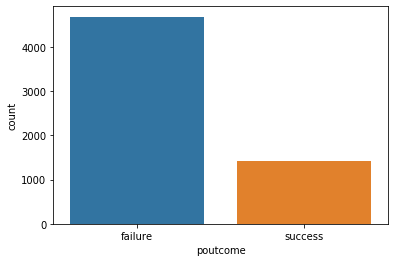

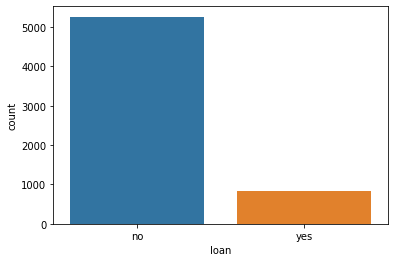

In [387]:
#plotting the class col
ax = sns.countplot(x="Target", data=bank_data)
plt.show()

#plotting the default col
ax = sns.countplot(x="default", data=bank_data)
plt.show()


#plotting the poutcome col
ax = sns.countplot(x="poutcome", data=bank_data)
plt.show()

#plotting the loan col
ax = sns.countplot(x="loan", data=bank_data)
plt.show()




In [388]:
# fixing Target
df_majority = bank_data[bank_data['Target'] == "no"]
df_minority = bank_data[bank_data['Target'] == "yes"]
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples=4200, random_state=123) #4200 to reach the majority class

In [389]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

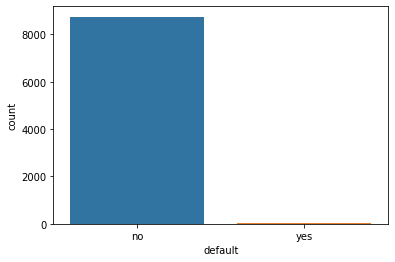

In [390]:
#plotting again to check
ax = sns.countplot(x="default", data=df_upsampled)

In [391]:
bank_data = df_upsampled #saving the changes to our dataset

In [392]:
#fixing default 
df_majority_def = bank_data[bank_data['default'] == "no"]
df_minority_def = bank_data[bank_data['default'] == "yes"]
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled_def = resample(df_minority_def, replace=True, n_samples=8200, random_state=123) #8200 to reach the majority class

In [393]:
# Combine majority class with upsampled minority class
df_upsampled_def = pd.concat([df_majority_def, df_minority_upsampled_def])

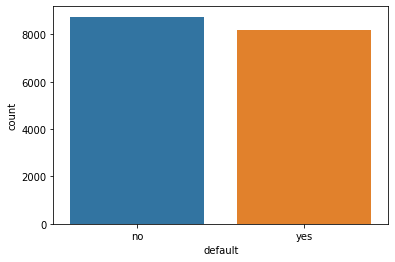

In [394]:
#plotting again to check
ax = sns.countplot(x="default", data=df_upsampled_def)

In [395]:
bank_data = df_upsampled_def#saving the changes to our dataset

In [396]:
#fixing poutcome 
df_majority_pout = bank_data[bank_data['poutcome'] == "failure"]
df_minority_pout = bank_data[bank_data['poutcome'] == "success"]
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled_pout = resample(df_minority_pout, replace=True, n_samples=12200, random_state=123) #12200 to reach the majority class

In [397]:
# Combine majority class with upsampled minority class
df_upsampled_pout = pd.concat([df_majority_pout, df_minority_upsampled_pout])

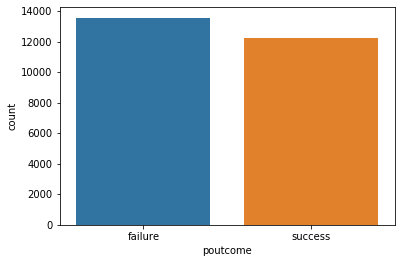

In [398]:
#plotting again to check
ax = sns.countplot(x="poutcome", data=df_upsampled_pout)

In [399]:
bank_data = df_upsampled_pout#saving the changes to our dataset

In [400]:
#fixing poutcome 
df_majority_loan = bank_data[bank_data['loan'] == "no"]
df_minority_loan = bank_data[bank_data['loan'] == "yes"]
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled_loan = resample(df_minority_loan, replace=True, n_samples=20000, random_state=123) #20000 to reach the majority class

In [401]:
# Combine majority class with upsampled minority class
df_upsampled_loan = pd.concat([df_majority_loan, df_minority_upsampled_loan])

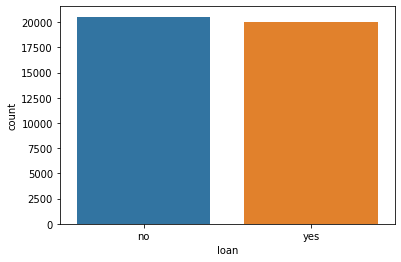

In [402]:
#plotting again to check
ax = sns.countplot(x="loan", data=df_upsampled_loan)

In [403]:
bank_data = df_upsampled_loan#saving the changes to our dataset

In [404]:
# At this point we fixed the imbalaned issue in our data, 
# Now, we will work on generating dummy variables

In [405]:
bank_data= pd.get_dummies(bank_data, prefix='contact', columns=['contact'])
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [406]:
bank_data= pd.get_dummies(bank_data, prefix='poutcome', columns=['poutcome'])
bank_data.drop(['poutcome_failure'],axis=1,inplace=True)
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'contact_cellular', 'contact_telephone', 'poutcome_success'],
      dtype='object')

In [407]:
bank_data= pd.get_dummies(bank_data, prefix='default', columns=['default'])
bank_data.drop(['default_no'],axis=1,inplace=True)
bank_data.rename(columns={'default_yes': 'default'}, inplace=True)
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'contact_cellular', 'contact_telephone', 'poutcome_success', 'default'],
      dtype='object')

In [408]:
bank_data= pd.get_dummies(bank_data, prefix='housing', columns=['housing'])
bank_data.drop(['housing_no'],axis=1,inplace=True)
bank_data.rename(columns={'housing_yes': 'housing'}, inplace=True)
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'Target',
       'contact_cellular', 'contact_telephone', 'poutcome_success', 'default',
       'housing'],
      dtype='object')

In [409]:
bank_data= pd.get_dummies(bank_data, prefix='loan', columns=['loan'])
bank_data.drop(['loan_no'],axis=1,inplace=True)
bank_data.rename(columns={'loan_yes': 'loan'}, inplace=True)
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'Target',
       'contact_cellular', 'contact_telephone', 'poutcome_success', 'default',
       'housing', 'loan'],
      dtype='object')

In [410]:
bank_data= pd.get_dummies(bank_data, prefix='job', columns=['job'])
bank_data.columns

Index(['age', 'marital', 'education', 'balance', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'Target', 'contact_cellular',
       'contact_telephone', 'poutcome_success', 'default', 'housing', 'loan',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [411]:
bank_data= pd.get_dummies(bank_data, prefix='marital', columns=['marital'])
bank_data.columns

Index(['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'Target', 'contact_cellular', 'contact_telephone',
       'poutcome_success', 'default', 'housing', 'loan', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single'],
      dtype='object')

In [412]:
bank_data= pd.get_dummies(bank_data, prefix='education', columns=['education'])
bank_data.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'Target', 'contact_cellular', 'contact_telephone',
       'poutcome_success', 'default', 'housing', 'loan', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary'],
      dtype='object')

In [413]:
bank_data= pd.get_dummies(bank_data, prefix='month', columns=['month'])
bank_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'contact_cellular', 'contact_telephone', 'poutcome_success',
       'default', 'housing', 'loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [414]:
bank_data= pd.get_dummies(bank_data, prefix='Target', columns=['Target'])
bank_data.drop(['Target_no'],axis=1,inplace=True)
bank_data.rename(columns={'Target_yes': 'Target'}, inplace=True)
bank_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'contact_cellular', 'contact_telephone', 'poutcome_success', 'default',
       'housing', 'loan', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'Target'],
      dtype='object')

In [415]:
# at this point, all of our attributes are numerical and hence we can check their description
# lets first start with calculating the correlation


In [416]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous,contact_cellular,contact_telephone,poutcome_success,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Target
age,1.000000,0.172292,-0.202258,-0.022742,0.113578,-0.073035,0.107779,-0.224805,0.224805,-0.007386,...,0.241502,-0.235682,0.019746,0.029686,0.065490,-0.082934,-0.020978,0.092907,0.057450,0.187527
balance,0.172292,1.000000,-0.052947,0.049776,0.011943,-0.078301,-0.037634,-0.122894,0.122894,0.166759,...,0.024806,-0.111321,0.080608,0.053527,0.046005,-0.069493,-0.082133,0.075776,0.111382,0.278375
day,-0.202258,-0.052947,1.000000,0.013055,-0.027289,-0.209758,-0.000533,0.042023,-0.042023,0.173267,...,-0.316433,0.614127,-0.033009,-0.104115,-0.044202,-0.352501,0.169650,0.046486,-0.078061,-0.127881
duration,-0.022742,0.049776,0.013055,1.000000,-0.105943,-0.149785,-0.078238,-0.066410,0.066410,0.325462,...,-0.102832,-0.204336,0.052188,0.017672,-0.006871,-0.055216,0.184899,0.031770,0.014979,0.283676
campaign,0.113578,0.011943,-0.027289,-0.105943,1.000000,0.048240,0.110177,-0.062817,0.062817,-0.075644,...,0.181937,0.054798,-0.007036,-0.014669,-0.013648,0.052435,-0.174680,-0.046812,-0.032680,-0.074845
pdays,-0.073035,-0.078301,-0.209758,-0.149785,0.048240,1.000000,-0.091107,0.039362,-0.039362,-0.413845,...,0.000699,-0.033236,0.150489,-0.114213,-0.020766,0.422714,-0.392540,-0.065725,-0.082112,-0.109892
previous,0.107779,-0.037634,-0.000533,-0.078238,0.110177,-0.091107,1.000000,-0.010005,0.010005,-0.079097,...,-0.068609,-0.126620,-0.002017,-0.005530,0.003168,0.011665,0.179223,-0.005719,0.043159,-0.013451
contact_cellular,-0.224805,-0.122894,0.042023,-0.066410,-0.062817,0.039362,-0.010005,1.000000,-1.000000,-0.085310,...,0.000320,0.040911,-0.034367,0.020168,-0.075828,0.005578,0.049926,-0.027102,-0.011728,-0.109687
contact_telephone,0.224805,0.122894,-0.042023,0.066410,0.062817,-0.039362,0.010005,-1.000000,1.000000,0.085310,...,-0.000320,-0.040911,0.034367,-0.020168,0.075828,-0.005578,-0.049926,0.027102,0.011728,0.109687
poutcome_success,-0.007386,0.166759,0.173267,0.325462,-0.075644,-0.413845,-0.079097,-0.085310,0.085310,1.000000,...,-0.092570,0.055030,0.060896,0.119898,0.104956,-0.306724,0.014035,0.129870,0.141544,0.463406


In [417]:
#visualizing the correlation using heatmap:

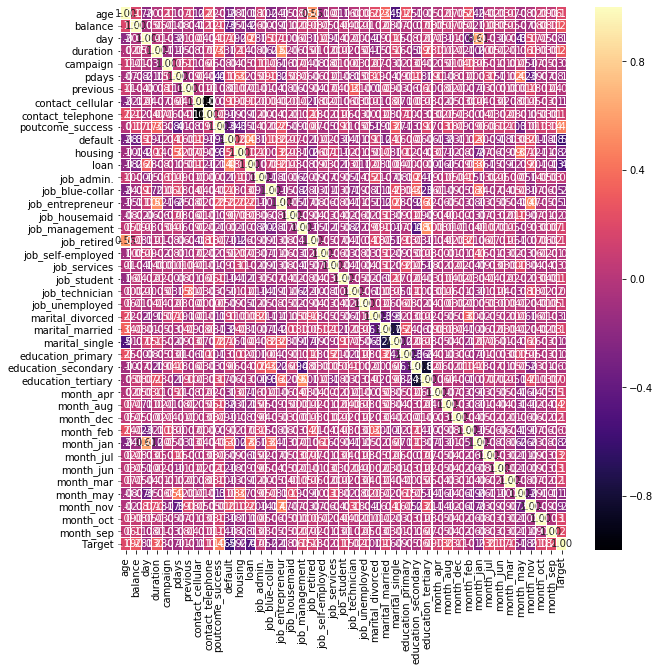

In [418]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(bank_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [419]:
# re-check the statistical desription:


In [420]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,40534.0,38.798737,11.630068,18.0,30.0,35.0,47.0,88.0
balance,40534.0,762.931243,2491.468331,-1884.0,-204.0,81.0,879.0,81204.0
day,40534.0,16.092071,8.598786,1.0,8.0,16.0,21.0,31.0
duration,40534.0,283.130286,261.221586,5.0,105.0,194.0,341.0,2219.0
campaign,40534.0,1.792717,1.219141,1.0,1.0,1.0,2.0,15.0
pdays,40534.0,210.540287,102.478959,1.0,110.0,188.0,287.0,871.0
previous,40534.0,3.083757,3.692511,1.0,1.0,2.0,3.0,55.0
contact_cellular,40534.0,0.966251,0.180586,0.0,1.0,1.0,1.0,1.0
contact_telephone,40534.0,0.033749,0.180586,0.0,0.0,0.0,0.0,1.0
poutcome_success,40534.0,0.434549,0.495704,0.0,0.0,0.0,1.0,1.0


In [421]:
#checking the outliers and tails :

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'contact_cellular', 'contact_telephone', 'poutcome_success', 'default', 'housing', 'loan', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'Target']


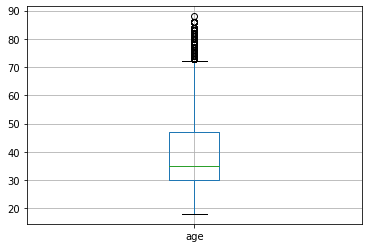

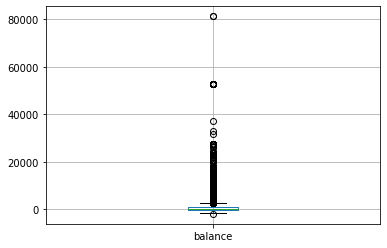

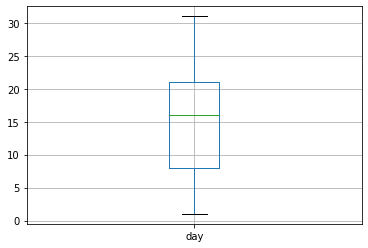

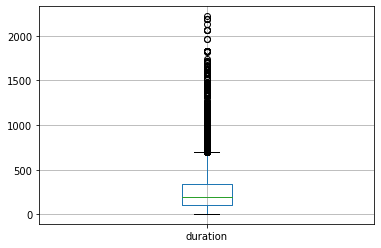

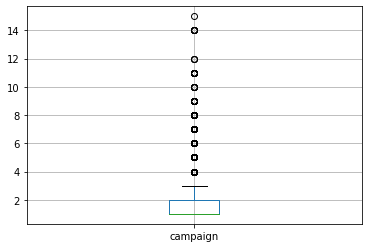

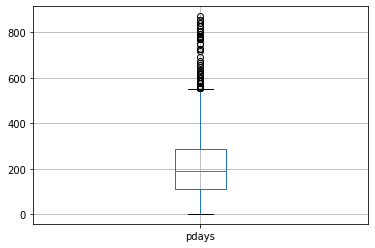

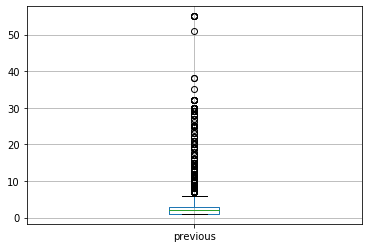

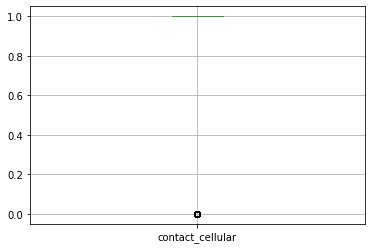

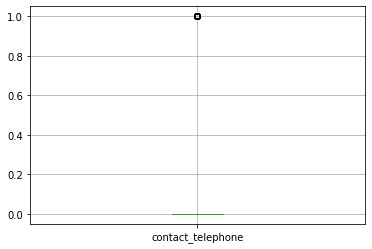

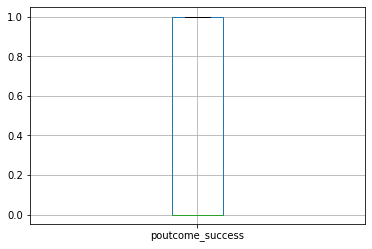

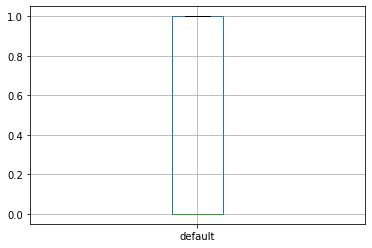

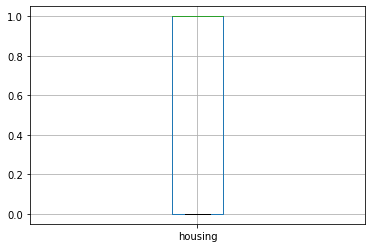

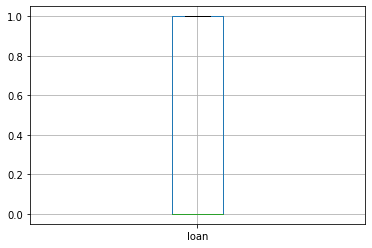

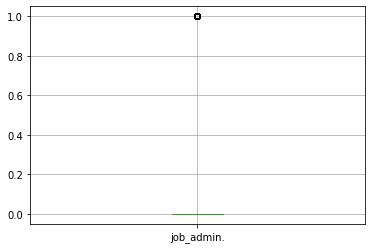

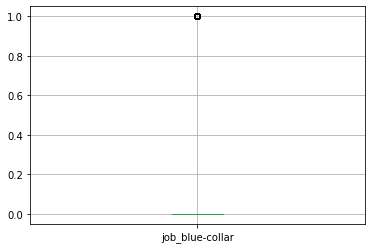

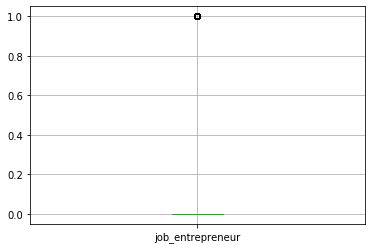

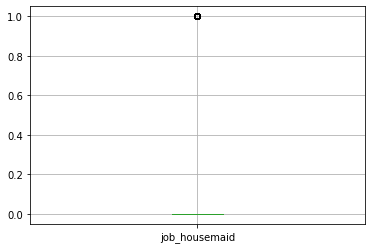

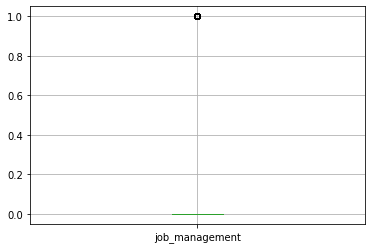

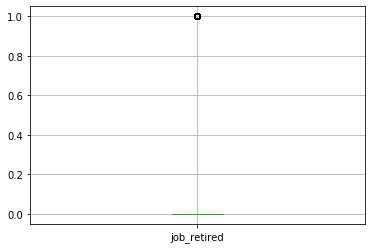

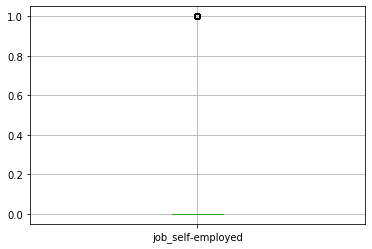

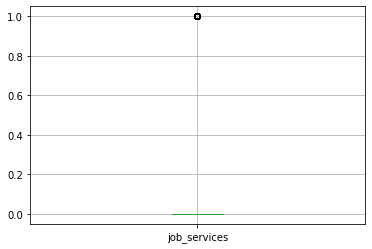

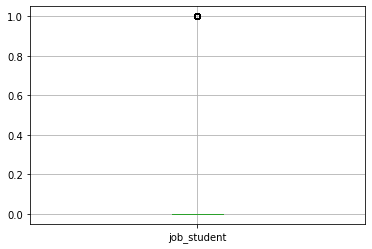

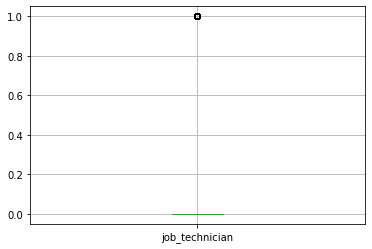

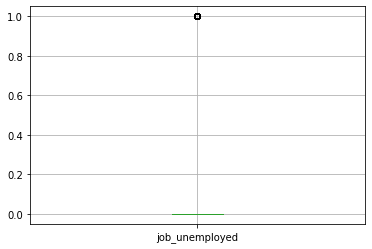

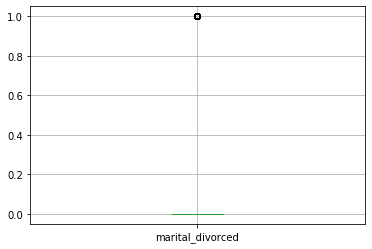

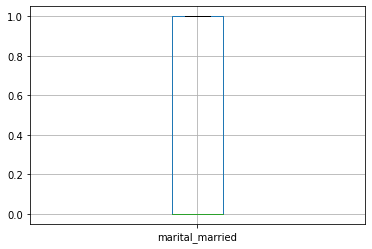

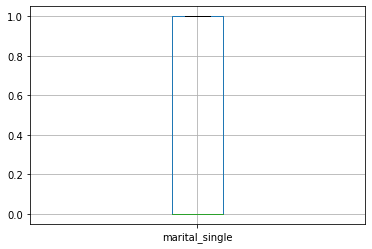

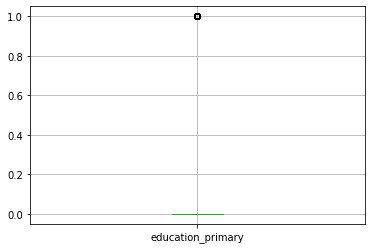

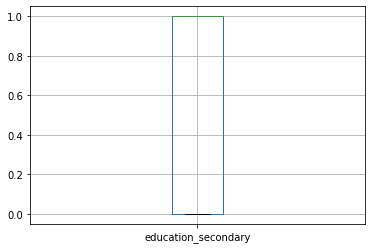

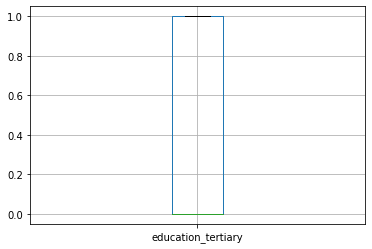

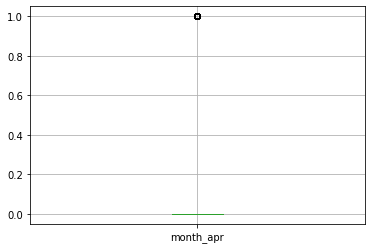

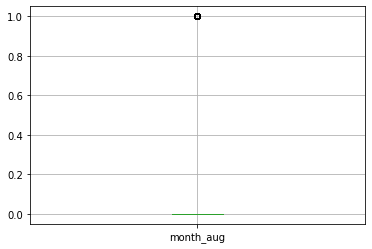

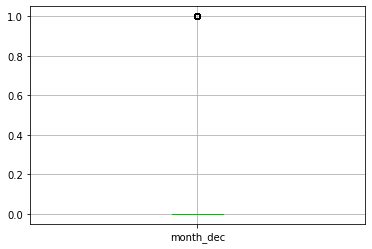

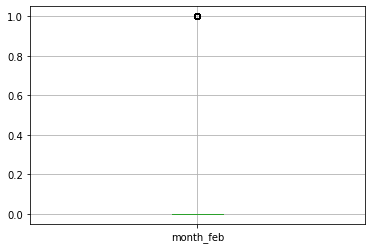

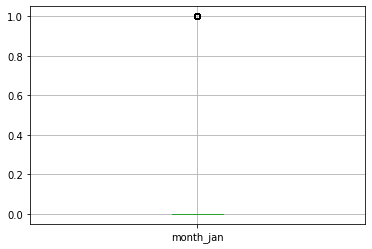

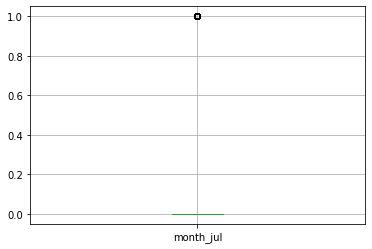

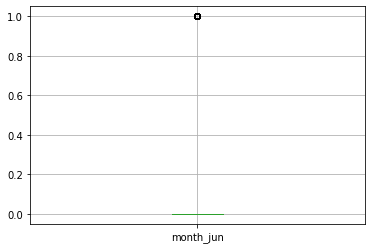

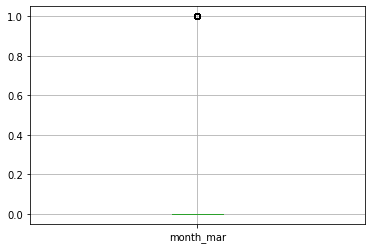

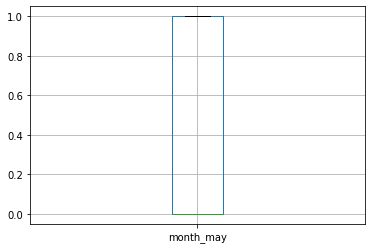

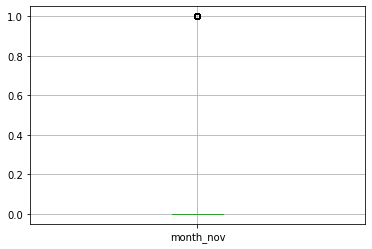

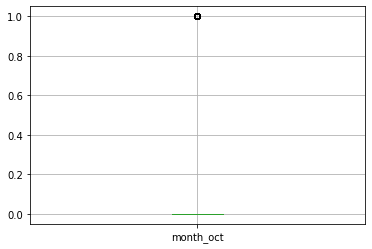

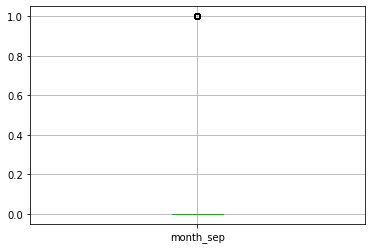

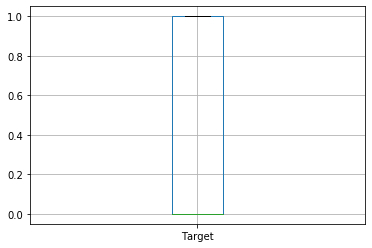

In [422]:
cols = bank_data.columns.tolist()
print(cols)
for col in cols:
    boxplot = bank_data.boxplot(column = col)
    plt.show()

In [423]:
#clear that age > 72 is outlier>> need to remove it:

bank_data = bank_data[bank_data.age < 73]

In [424]:
#balance column is highly skewed and contains a lot of negative values >> will drop it:
bank_data = bank_data.drop(['balance'], axis=1)

In [425]:
#clear that duration > 500 is outlier>> need to remove it:

bank_data = bank_data[bank_data.duration < 500]

In [426]:
#Bi-variant analysis:

In [427]:
bank_data.head()

,age,day,duration,campaign,pdays,previous,contact_cellular,contact_telephone,poutcome_success,default,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Target
24060,33,21,39,1,151,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
24127,51,5,449,1,176,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24151,33,10,175,1,174,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24170,30,13,86,1,174,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24184,44,17,81,1,195,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [371]:
bank_data_attr = bank_data.iloc[:, 0:42]
sns.pairplot(bank_data_attr, diag_kind='kde')

Error in callback <function flush_figures at 0x11cae10d0> (for post_execute):


KeyboardInterrupt: 

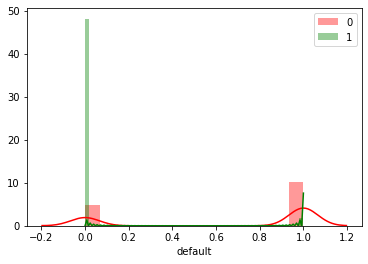

In [428]:
sns.distplot(bank_data[bank_data['Target']==0]['default'],color='r',label=0)
sns.distplot(bank_data[bank_data['Target']==1]['default'],color='g',label=1)
plt.legend()
plt.show()

In [ ]:
# All customers not having credit card by default, they are more likely to subscribe 

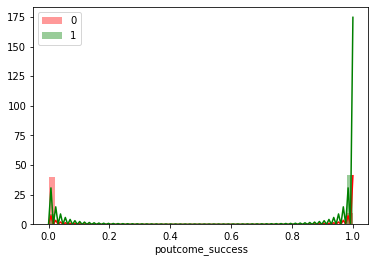

In [429]:
sns.distplot(bank_data[bank_data['Target']==0]['poutcome_success'],color='r',label=0)
sns.distplot(bank_data[bank_data['Target']==1]['poutcome_success'],color='g',label=1)
plt.legend()
plt.show()

In [ ]:
# All customers succeesed the previous marketing campain, they are more likely to subscribe 

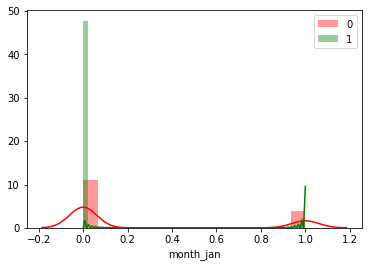

In [430]:
sns.distplot(bank_data[bank_data['Target']==0]['month_jan'],color='r',label=0)
sns.distplot(bank_data[bank_data['Target']==1]['month_jan'],color='g',label=1)
plt.legend()
plt.show()


In [ ]:
# All customers not having personal loans, they are more likely to subscribe 

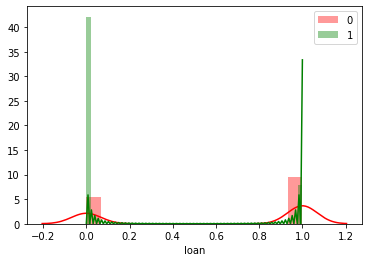

In [431]:
sns.distplot(bank_data[bank_data['Target']==0]['loan'],color='r',label=0)
sns.distplot(bank_data[bank_data['Target']==1]['loan'],color='g',label=1)
plt.legend()
plt.show()

In [ ]:
# All customers not having personal loans, they are more likely to subscribe 

In [432]:
# Starting Building data model:

In [433]:
X = bank_data.drop('Target',axis=1)     # Predictor feature columns (8 X m)
y = bank_data['Target']   # Predicted class (1=True, 0=False) (1 X m)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,age,day,duration,campaign,pdays,previous,contact_cellular,contact_telephone,poutcome_success,default,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
43890,36,9,150,1,92,5,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
31562,34,3,84,1,332,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42742,38,27,240,1,92,4,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
35176,28,7,27,1,345,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
28577,27,29,123,2,205,2,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [434]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bank_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bank_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [435]:
#Logistic regression
model_logistic = LogisticRegression(solver="liblinear")

In [436]:
#fitting the model
model_logistic.fit(X_train, y_train)
#predict on test
y_predict_logistic = model_logistic.predict(X_test)

In [437]:
model_score = model_logistic.score(X_test, y_test)
print("Accuracy: ", model_score*100, "%")

Accuracy:  91.44251842996613 %


In [438]:
from sklearn.metrics import f1_score
f1_score_logistic= f1_score(y_test,y_predict_logistic, average="weighted")
print('F1 score: %.3f' % f1_score_logistic)

F1 score: 0.915


In [439]:
from sklearn.metrics import precision_score
precision_logistic = precision_score(y_test,y_predict_logistic, average="weighted")
print('Precision: %.3f' % precision_logistic)

Precision: 0.917


In [440]:
from sklearn.metrics import recall_score
recall_logistic = recall_score(y_test,y_predict_logistic, average="macro")
print('Recall: %.3f' % recall_logistic)

Recall: 0.905


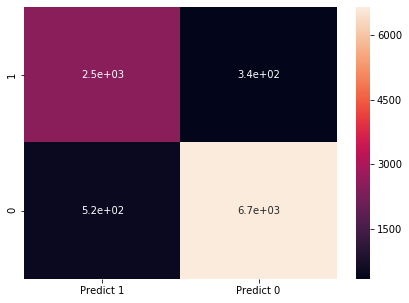

In [441]:
cm=metrics.confusion_matrix(y_test,y_predict_logistic , labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [442]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': model_score})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf



,Method,accuracy
0,Logistic Regression,0.914425


In [443]:
#Decision Tree

In [444]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(criterion='entropy')

In [445]:
#fitting the model
model_decision_tree.fit(X_train, y_train)
#predict on test
y_predict_dt = model_decision_tree.predict(X_test)

In [446]:
model_score_dt = model_decision_tree.score(X_test, y_test)
print("Accuracy: ", model_score_dt*100, "%")

Accuracy:  98.7646941621837 %


In [447]:
from sklearn.metrics import f1_score
f1_score_dt= f1_score(y_test,y_predict_dt, average="weighted")
print('F1 score: %.3f' % f1_score_dt)

F1 score: 0.988


In [448]:
from sklearn.metrics import precision_score
precision_dt = precision_score(y_test,y_predict_dt, average="weighted")
print('Precision: %.3f' % precision_dt)

Precision: 0.988


In [449]:
from sklearn.metrics import recall_score
recall_dt = recall_score(y_test,y_predict_dt, average="macro")
print('Recall: %.3f' % recall_dt)

Recall: 0.988


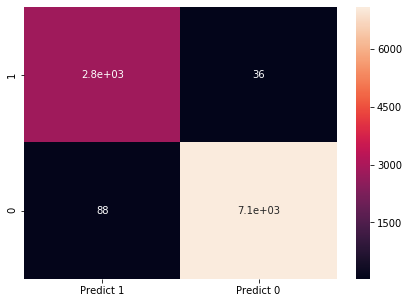

In [450]:
cm=metrics.confusion_matrix(y_test,y_predict_dt , labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [451]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [model_score_dt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
#below dataframe

,Method,accuracy
0,Logistic Regression,0.914425
0,Decision Tree,0.987647


In [452]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [453]:
#ensemble techniques

In [454]:
from sklearn.metrics import accuracy_score
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [455]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
#below dataframe

,Method,accuracy
0,Logistic Regression,0.914425
0,Decision Tree,0.987647
0,Adaboost,0.904961


In [456]:
### Apply Bagging Classifier Algorithm and print the accuracy.

In [457]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [458]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [459]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
#below dataframe

,Method,accuracy
0,Logistic Regression,0.914425
0,Decision Tree,0.987647
0,Adaboost,0.904961
0,Bagging,0.989540


In [460]:
### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [461]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [462]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [463]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
#below dataframe

,Method,accuracy
0,Logistic Regression,0.914425
0,Decision Tree,0.987647
0,Adaboost,0.904961
0,Bagging,0.989540
0,Gradient Boost,0.926181


In [464]:
import pandas_profiling
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
# Based on the analysis above, the best algorithim is the bagging ensemble technique because it is giving 
# the highest accuracy. It is working on building more than one model and smoothing thier accuracy to finaly build 
# the best model we can have
